In [1]:
#import dependencies
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

import pandas as pd
#variables for connection in the config file
from config import db_user, db_password, db_host, db_port

# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func



In [2]:
# variables to populate the database connection string

# This database must already exist
db_name = "employee_db"


engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")
connection = engine.connect()

print

<function print>

In [3]:
# Import the Employees table"
#employees = pd.read_sql('select * from employees', connection, parse_dates=['birth_date', 'hire_date'])
employees = pd.read_sql('select * from employees', connection)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#rename the title column in the employees table
employees.rename(columns = {'emp_title_id':'title_id'}, inplace = True)
employees.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
# Import the Titles table
titles = pd.read_sql('select * from titles', connection)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
#import salaries table
salaries = pd.read_sql('select * from salaries', connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
# Create a merged dataframe of titles and salaries
employee_title = titles.merge(employees, on='title_id')
employee_title.tail(20)

,title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date
300004,m0001,Manager,110725,1961-03-14,Peternela,Onuegbe,F,1985-01-01
300005,m0001,Manager,110022,1956-09-12,Margareta,Markovitch,M,1985-01-01
300006,m0001,Manager,111035,1962-02-24,Przemyslawa,Kaelbling,M,1985-01-01
300007,m0001,Manager,110511,1957-07-08,DeForest,Hagimont,M,1985-01-01
300008,m0001,Manager,110567,1964-04-25,Leon,DasSarma,F,1986-10-21
300009,m0001,Manager,110183,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01
300010,m0001,Manager,111939,1960-03-25,Yuchang,Weedman,M,1989-07-10
300011,m0001,Manager,110114,1957-03-28,Isamu,Legleitner,F,1985-01-14
300012,m0001,Manager,110854,1960-08-19,Dung,Pesch,M,1989-06-09
300013,m0001,Manager,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12


In [8]:
# Create a merged dataframe of titles and employees
employee_titlesalaries = salaries.merge(employee_title, on='emp_no')
employee_titlesalaries.tail(20)

,emp_no,salary,title_id,title,birth_date,first_name,last_name,sex,hire_date
300004,499980,90395,s0001,Staff,1959-06-28,Gino,Usery,M,1991-02-11
300005,499981,42720,s0001,Staff,1955-01-02,Yunming,Mitina,F,1991-03-07
300006,499982,40000,s0001,Staff,1954-08-25,Mohammed,Pleszkun,M,1986-02-21
300007,499983,40000,s0001,Staff,1955-08-29,Uri,Juneja,F,1989-08-28
300008,499984,40000,e0003,Senior Engineer,1959-08-31,Kaijung,Rodham,M,1985-09-11
300009,499985,40000,s0001,Staff,1964-12-26,Gila,Lukaszewicz,M,1997-02-11
300010,499986,91988,s0001,Staff,1952-07-22,Nathan,Ranta,F,1985-08-11
300011,499987,52282,s0001,Staff,1961-09-05,Rimli,Dusink,F,1998-09-20
300012,499988,74890,s0001,Staff,1962-09-28,Bangqing,Kleiser,F,1986-06-06
300013,499989,64183,s0002,Senior Staff,1954-05-26,Keiichiro,Lindqvist,M,1993-10-28


In [9]:
#Create a histogram to visualize the most common salary ranges for employees.
salarygroups = employee_titlesalaries.groupby('title')['salary'].mean().round(2)
salarygroups

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64

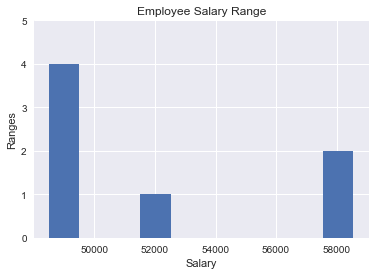

In [10]:
# plot the histogram given number of employees in bins

# x= salarygroups['title']
# y= salarygroups['Salary']

# data =[x,y]

salarygroups.hist(bins=10)

#chart titles
plt.ylim(47000, 59000)
plt.ylim(0, 5)
plt.title("Employee Salary Range")
plt.xlabel("Salary")
plt.ylabel("Ranges")
plt.show()


In [11]:
#calc the average salary by title
salarygroups = employee_titlesalaries.groupby('title')['salary'].mean().round(2)
salarygroups.head()

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Name: salary, dtype: float64

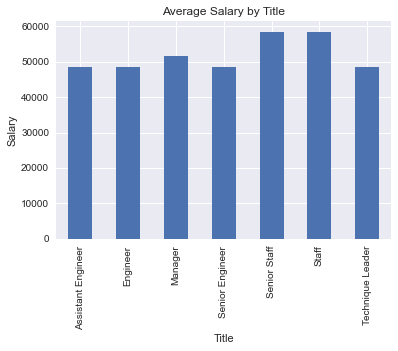

In [12]:
#bar chart on the data
salarygroups.plot(kind='bar')
#chart titles

plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Salary")
plt.show()

